In [1]:
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import yeojohnson
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import os
from datetime import date
import holidays
import ts_function as tsf
import matplotlib.patches as mpatches
import time

In [2]:
start_time = time.time()

data = pd.read_csv("data.csv")
# Convert 'min_t' column to datetime format
data["min_t"] = pd.to_datetime(data["min_t"])

# Define the expected date range with 15-minute frequency00
start_date = data["min_t"].min()
end_date = data["min_t"].max()
expected_date_range = pd.date_range(start=start_date, end=end_date, freq='15T')
# Set 'min_t' column as the datetime index and reindex with expected date range
data = data.set_index('min_t').reindex(expected_date_range)
# Add columns for month, day, hour, minute, day of week, quarter, and year
data['month'] = data.index.month
data['day'] = data.index.day
data['hour'] = data.index.hour
data['minute'] = data.index.minute
data['dayofweek'] = data.index.dayofweek  # Monday=0, Sunday=6
data['quarter'] = data.index.quarter
data['year'] = data.index.year
data['date'] = data.index.date

In [3]:
## Check if data is sorted
(data.sort_index().index==data.index).sum()==data.shape[0]

True

In [4]:
a = ['4741', '6406', '3461', '11141', '4746', '8976', '1681', '10646',
       '8731', '4766', '9121', '9251', '4771', '10406', '10536', '4521',
       '8746', '10411', '4786', '10421', '11061', '6966', '8761', '10811',
       '9916', '1726', '11071', '8641', '6471', '6986', '9291', '9421',
       '10706', '851', '6356', '4696', '4441', '4576', '4706', '4196', '4201',
       '1001', '11116', '4461', '751', '8816', '4721', '759', '1016', '10746']

In [5]:
b = ['4741', '6406', '3461', '11141', '4746', '8976', '1681', 
       '10646', '8731', '4766', '9121', '9251', '4771', '10406', '10536',
       '4521', '8746', '10411', '4786', '10421', '11061', '6966', '8761',
       '10811', '9916', '1726', '11071', '8641', '6471', '6986', '9291',
       '9421', '10706', '851', '6356', '4696', '4441', '4576', '4706', '4196',
       '4201', '1001', '11116', '4461', '751', '8816', '4721', '759', '1016',
       '10746']

In [6]:
site_data = data[a] 
site_data

,4741,6406,3461,11141,4746,8976,1681,10646,8731,4766,...,4201,1001,11116,4461,751,8816,4721,759,1016,10746
2020-01-01 00:00:00,0.127412,0.199737,0.144476,0.775111,0.096937,0.234762,0.176263,0.282187,0.90520,0.081611,...,0.320824,0.051312,0.068444,0.444188,0.265333,0.445000,0.0676,0.294118,0.918067,0.288048
2020-01-01 00:15:00,0.122059,0.173526,0.106571,0.470611,0.111562,0.051048,0.183842,0.206687,0.79895,0.110444,...,0.355294,0.172125,0.050000,0.099000,0.478583,0.421250,0.0720,0.252647,0.880333,0.281714
2020-01-01 00:30:00,0.142941,0.158421,0.116095,0.477000,0.117000,0.255286,0.163737,0.212500,0.65565,0.265944,...,0.372176,0.018937,0.046889,0.310937,0.415250,0.336062,0.0831,0.095235,0.410267,0.363714
2020-01-01 00:45:00,0.158294,0.158684,0.124000,0.225000,0.109937,0.192286,0.121526,0.203187,0.74850,0.456000,...,0.409882,0.207125,0.048889,0.064000,0.324583,0.649937,0.5621,0.144176,0.416533,0.874810
2020-01-01 01:00:00,0.123059,0.174842,0.132619,0.237444,0.115875,0.385286,0.186579,0.211250,0.67410,0.433389,...,0.385941,0.016375,0.082833,0.276875,0.276417,0.502437,0.5365,0.097529,0.385533,0.925619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31 22:45:00,0.191529,0.276789,0.039000,0.592722,0.062937,0.140524,0.184095,0.517062,0.52490,0.033444,...,0.296941,0.124125,0.029722,0.418750,0.271167,0.067562,0.0504,0.033412,0.010800,0.200714
2022-03-31 23:00:00,0.190529,0.261947,0.047333,0.185111,0.043312,0.021667,0.132143,0.310937,0.31720,0.125722,...,0.272412,0.473687,0.036111,0.079187,0.254417,0.082687,0.0585,0.017882,0.014467,0.695476
2022-03-31 23:15:00,0.196471,0.244526,0.052238,0.215222,0.020875,0.023476,0.471000,0.330813,0.20550,0.075611,...,0.161824,0.225000,0.030889,0.085687,0.341167,0.090438,0.0393,0.018235,0.010600,0.881905
2022-03-31 23:30:00,0.204706,0.254000,0.037762,0.310500,0.098187,0.021810,0.544429,0.326813,0.07625,0.104500,...,0.152176,0.083437,0.051778,0.073688,0.320333,0.110437,0.0561,0.031353,0.006467,0.464476


In [7]:
site_data.isnull().sum()

4741      107
6406      107
3461       54
11141     108
4746      107
8976      107
1681       12
10646     107
8731      107
4766      107
9121      108
9251      107
4771      687
10406     107
10536     107
4521     2567
8746      107
10411     107
4786      107
10421     107
11061     107
6966     5872
8761      107
10811     107
9916      122
1726       50
11071     107
8641      107
6471      107
6986      108
9291      108
9421      108
10706     115
851       431
6356      107
4696      107
4441      191
4576      107
4706     2094
4196      609
4201      107
1001       12
11116     107
4461      107
751        79
8816      107
4721     2596
759       107
1016       37
10746     107
dtype: int64

In [8]:
# Convert all columns to numeric type (float)
site_data = site_data.apply(pd.to_numeric, errors='coerce')  # coerce errors to NaN for non-convertible strings

# Calculate the mean of each row (ignoring NaN values)
row_means = site_data.mean(axis=1, skipna=True)

# Replace NaN values in each row with the row mean
site_data = site_data.apply(lambda row: row.fillna(row.mean()), axis=1)

site_data.isnull().sum()

4741     12
6406     12
3461     12
11141    12
4746     12
8976     12
1681     12
10646    12
8731     12
4766     12
9121     12
9251     12
4771     12
10406    12
10536    12
4521     12
8746     12
10411    12
4786     12
10421    12
11061    12
6966     12
8761     12
10811    12
9916     12
1726     12
11071    12
8641     12
6471     12
6986     12
9291     12
9421     12
10706    12
851      12
6356     12
4696     12
4441     12
4576     12
4706     12
4196     12
4201     12
1001     12
11116    12
4461     12
751      12
8816     12
4721     12
759      12
1016     12
10746    12
dtype: int64

In [9]:
### Vertival interpolation
site_data = site_data.interpolate()

In [10]:
site_data.isna().sum().sum()

0

In [11]:
data["total_power"] = site_data.sum(axis=1)

In [12]:
data[a] = site_data

## Set the index to date time with 15 min interval from 2020-1-1 00:00:00 to 2022-03-21 23:45:00

In [13]:
data.isna().sum()

4741        0
6406        0
3461        0
11141       0
4746        0
           ..
quarter     0
year        0
date        0
holiday    12
temp       12
Length: 61, dtype: int64

In [14]:
# add holidays including the weekends
holiday_list=[]
for ptr in holidays.UnitedStates(years = [2020,2021,2022]).items():
    holiday_list.append(str( ptr[0]))
    
total_days=data.shape[0]
holidays_arr=np.zeros(total_days)

#for weekdays as holidays
for i in range(0,total_days):
    if str(data["date"][i]) in holiday_list:
        holidays_arr[i]=1

#for weekends as holidays
for i in range(0,total_days):
    if data["dayofweek"][i]==5 or data["dayofweek"][i]==6:
        holidays_arr[i]=1
        
data["holiday"]=holidays_arr
data["temp"]=data["temp"].interpolate()

C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_36976\3796554746.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if str(data["date"][i]) in holiday_list:
C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_36976\3796554746.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data["dayofweek"][i]==5 or data["dayofweek"][i]==6:


In [15]:
data.isna().sum()

4741       0
6406       0
3461       0
11141      0
4746       0
          ..
quarter    0
year       0
date       0
holiday    0
temp       0
Length: 61, dtype: int64

In [16]:
## Create lag variables
num_lag_days = 4

# Create lagged columns for specified number of lag days
for lag_days in range(1, num_lag_days + 1):
    column_name = f'power_lag_{lag_days}_day'
    data[column_name] = data['total_power'].shift(periods=lag_days * 96)  # Shifting by lag_days days

# Display the DataFrame with lagged columns
data.tail()

,4741,6406,3461,11141,4746,8976,1681,10646,8731,4766,...,dayofweek,quarter,year,date,holiday,temp,power_lag_1_day,power_lag_2_day,power_lag_3_day,power_lag_4_day
2022-03-31 22:45:00,0.191529,0.276789,0.039000,0.592722,0.062937,0.140524,0.184095,0.517062,0.52490,0.033444,...,3,1,2022,2022-03-31,0.0,62.4,7.467477,8.005408,8.758789,8.381417
2022-03-31 23:00:00,0.190529,0.261947,0.047333,0.185111,0.043312,0.021667,0.132143,0.310937,0.31720,0.125722,...,3,1,2022,2022-03-31,0.0,62.5,7.040345,7.787749,7.897097,9.603562
2022-03-31 23:15:00,0.196471,0.244526,0.052238,0.215222,0.020875,0.023476,0.471000,0.330813,0.20550,0.075611,...,3,1,2022,2022-03-31,0.0,62.7,5.827387,6.997056,6.328941,9.670107
2022-03-31 23:30:00,0.204706,0.254000,0.037762,0.310500,0.098187,0.021810,0.544429,0.326813,0.07625,0.104500,...,3,1,2022,2022-03-31,0.0,62.3,8.877407,7.425377,7.643645,8.499912
2022-03-31 23:45:00,0.231235,0.259368,0.024857,0.559833,0.090250,0.107476,0.259571,0.186688,0.08050,0.199500,...,3,1,2022,2022-03-31,0.0,60.7,11.025874,6.450620,10.743793,9.275064


In [17]:
data[data["year"]==2021].isna().sum().sum()

0

In [18]:
data[data["year"]==2022].isna().sum().sum()

0

In [19]:
data[data["year"]==2021].to_csv("train_2021.csv", index = False)
data[data["year"]==2022].to_csv("test_2022.csv", index = False)

In [20]:
data[data["year"]==2021].columns

Index(['4741', '6406', '3461', '11141', '4746', '8976', '1681', '10646',
       '8731', '4766', '9121', '9251', '4771', '10406', '10536', '4521',
       '8746', '10411', '4786', '10421', '11061', '6966', '8761', '10811',
       '9916', '1726', '11071', '8641', '6471', '6986', '9291', '9421',
       '10706', '851', '6356', '4696', '4441', '4576', '4706', '4196', '4201',
       '1001', '11116', '4461', '751', '8816', '4721', '759', '1016', '10746',
       'total_power', 'month', 'day', 'hour', 'minute', 'dayofweek', 'quarter',
       'year', 'date', 'holiday', 'temp', 'power_lag_1_day', 'power_lag_2_day',
       'power_lag_3_day', 'power_lag_4_day'],
      dtype='object')

## Extract the temperature data, total power data from the data df and then interpolate. Add back all the exogenous variable

In [21]:
## add wind, humidity, heating and cooling dates data later

In [22]:
data_train=data[data["year"]==2021]
data_test=data[data["year"]==2022]

### Check the moving average forecast for each year (this is the smooth trend line of the electricity consumption), we will checl if this trend line is same for every year

In [23]:
## Data for 2020, 2021 amd 2022, check if all date times are present
data_20=data[data["year"]==2020]
data_21=data[data["year"]==2021]
data_22=data[data["year"]==2022]
print(data_20.shape, data_21.shape, data_22.shape)

(35136, 65) (35040, 65) (8640, 65)


In [24]:
moving_average_20_y=data_20["total_power"].rolling(96).mean()    #, min_periods=1
moving_average_21_y=data_21["total_power"].rolling(96).mean()
moving_average_22_y=data_22["total_power"].rolling(96).mean() 
moving_average_20_temp=data_20["temp"].rolling(500).mean()    #, min_periods=1
moving_average_21_temp=data_21["temp"].rolling(500).mean()
moving_average_22_temp=data_22["temp"].rolling(500).mean() 

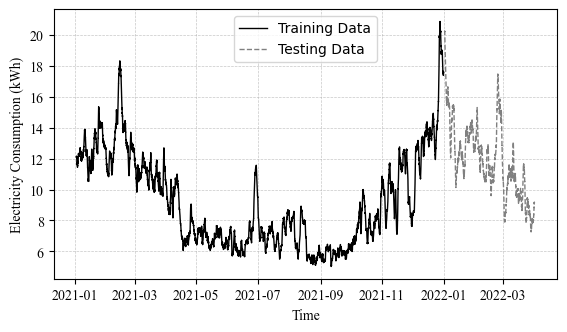

In [25]:
import matplotlib.pyplot as plt

# Set figure size for journal format
plt.figure(figsize=(6.5, 3.5))

# Plot data with distinct line styles for readability in grayscale
plt.plot(moving_average_21_y, color="black", linestyle="-", linewidth=1, label="Training Data")
plt.plot(moving_average_22_y, color="gray", linestyle="--", linewidth=1, label="Testing Data")

# Label axes with journal-appropriate font size
plt.xlabel("Time", fontsize=10, fontname="Times New Roman")
plt.ylabel("Electricity Consumption (kWh)", fontsize=10, fontname="Times New Roman")

# Ensure consistent font for ticks
plt.xticks(fontsize=10, fontname="Times New Roman")
plt.yticks(fontsize=10, fontname="Times New Roman")

# Add a legend inside the plot for better space usage
plt.legend(fontsize=10, loc="best", frameon=True)

# Add a subtle grid
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

# Save as high-resolution figure for publication
plt.savefig("electricity_consumption_train_vs_test.png", dpi=600, bbox_inches="tight")

# Show the plot
plt.show()


In [26]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [27]:
acfplot = np.array(data_21["total_power"])    ##mon trining set

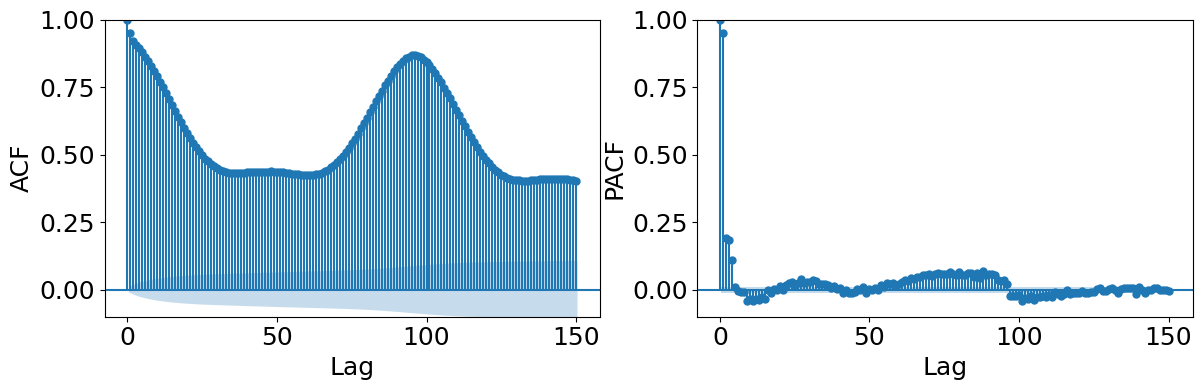

In [28]:
# Create the subplots with reduced figure size
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot ACF and PACF with appropriate font sizes
plot_acf(acfplot, lags=150, ax=ax[0])
plot_pacf(acfplot, lags=150, ax=ax[1], method='ols')
# Remove automatically generated titles
ax[0].set_title("")  
ax[1].set_title("")
# Set y-axis limits to remove excessive negative space
ax[0].set_ylim(-0.1, 1.0)  # Adjust based on actual ACF values
ax[1].set_ylim(-0.1, 1.0)  # Adjust based on actual PACF values

# Set axis labels with font size 18
ax[0].set_ylabel("ACF", fontsize=18)
ax[1].set_ylabel("PACF", fontsize=18)

# Keep "Lag" as the x-axis label for both plots
for a in ax:
    a.set_xlabel("Lag", fontsize=18)
    a.tick_params(axis='both', which='both', labelsize=18)

# Adjust layout
plt.tight_layout()

# Save the figure in high resolution
plt.savefig("acf_pacf_plotiise.png", dpi=700, bbox_inches='tight')  # High resolution for publication

# Show the plot
plt.show()

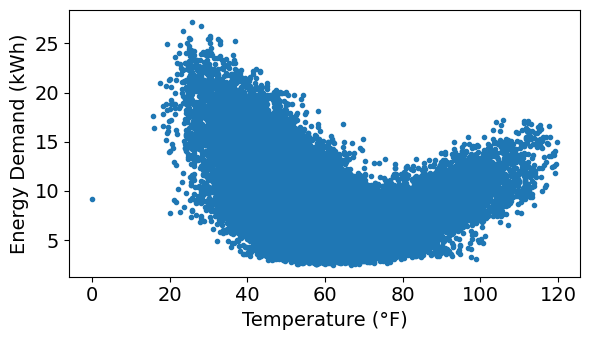

In [29]:
# Create scatter plot
plt.figure(figsize=(6, 3.5))  # Adjust size for compact presentation
plt.scatter(data_21["temp"], data_21["total_power"], marker=".")

# Set axis labels with proper font size
plt.xlabel("Temperature (°F)", fontsize=14)
plt.ylabel("Energy Demand (kWh)", fontsize=14)

# Set tick label size
plt.tick_params(axis='both', which='both', labelsize=14)

# Save the figure in high resolution
plt.tight_layout()
plt.savefig("dem_vs_temp.png", dpi=700, bbox_inches='tight')

# Show the plot
plt.show()

In [30]:
print(f'Total Script time:{time.time()-start_time}')

Total Script time:23.057467937469482
